# UC San Diego: Data Science in Practice
## Influence of Ethnicity on Baby Naming Trends

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [X] NO - keep private

# Names

- Nini Pham

# Overview

My project aimed to look at the naming trends for babies in New York from 2011 to 2019, specifically focusing on understanding the potential influences of demographic factors, particularly ethnicities, on name choices. I seek to uncover insight on the relationship and diversity between names and specific ethnic groups by exploring a comprehensive dataset with baby names, ethnicities, and their popularity. I applied an OLS Regression test with multivariables to explore the possible relationship between baby names and ethnicities.

<a id='research_question'></a>
# Research Question

How does ethnicity influence the popularity and diversity of baby names in a diverse environment like New York?

<a id='background'></a>

## Background & Prior Work

Baby names are more than just labels, they are able to carry significant cultural, social, and historical significance. However, baby names can often pose a negative effect on the trajectory of that baby's future. Individuals may face implicit bias and discrimination based on their name and perhaps even fail a few job interviews because of it (Lewis 2015). It is still important to hold on to our heritage and be proud of our names, as naming a baby can be an opportunity to uphold traditions and family history. Other studies even show that children with unusual names can benefit from being teased by learning how to control their emotions and impulses. 

There seems to be a potential correlation in baby names and ethnicities, as people in Asian and Pacific Islander groups tend to name their baby with names that hold hidden meanings and significant cultural implications. Being an Asian American myself, I was particularly interested in whether or not there was a correlation and if there were certain names that I would recognize or even thought of naming my baby in the future.

References (include links):
- 1) What Baby Names Tell Us - Cdn.Sisense.Com, cdn.sisense.com/wp-content/uploads/What-Baby-Names-Tell-Us-About-Ethnic-and-Gender-Trends.pdf. Accessed 5 Aug. 2023. 
https://lifestyle.howstuffworks.com/family/parenting/babies/baby-name-trends-ga2.htm
- 2) Lewis, Katherine Reynolds. “Perspective | Baby Names: Should It Matter If They Indicate Your Race?” The Washington Post, 2 Nov. 2021, www.washingtonpost.com/news/parenting/wp/2015/10/19/baby-names-should-it-matter-if-they-indicate-your-race/. 
- 3) “Baby Name Lists by Origin.” Diverse Baby Names by Origin | The Bump, www.thebump.com/b/baby-name-origins. Accessed 5 Aug. 2023. 


# Hypothesis


There is a correlation between ethnicity and baby names, such that individuals of specific ethnic backgrounds tend to choose names that are prevalent and culturally significant in their specific ethnic group.

# Dataset(s)

Dataset: Popular Baby Names
- Dataset Name: data.cityofnewyork.us
- Link to the dataset: 'https://data.cityofnewyork.us/api/views/25th-nujf/rows.csv?accessType=DOWNLOAD'
- Number of observations: 57582

This csv file was downloaded from the Sex and Ethnic Group Data, who collected this information through civil birth registration. This dataset includes the year of birth, gender, ethnicity, and first name (also its count & rank) of the children being born within 2011 to 2019 in New York. It has 57582 rows and 6 columns. 

# Data Wrangling

* Explain steps taken to pull the data you need into Python.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import patsy
import statsmodels.api as sm

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


# Data Cleaning

First we need to read in data from the csv file and check for any missing values.

In [2]:
#load the baby names csv and assign it to names_df
names_df = pd.read_csv('https://data.cityofnewyork.us/api/views/25th-nujf/rows.csv?accessType=DOWNLOAD')
names_df.head()

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42
3,2011,FEMALE,HISPANIC,GISELLE,38,51
4,2011,FEMALE,HISPANIC,GRACE,36,53


In [3]:
#there are 57582 rows and 6 columns in the dataset
names_shape = names_df.shape
names_shape

(57582, 6)

In [4]:
# check that there are no missing values
missing = names_df[names_df.isnull().any(axis=1)] 

names_df.isnull().any(axis=1).sum()

0

In [5]:
names_df.isnull().any()

Year of Birth         False
Gender                False
Ethnicity             False
Child's First Name    False
Count                 False
Rank                  False
dtype: bool

In [6]:
#rename columns according to our own convenience
names_df = names_df.rename(columns={"Year of Birth" : "Year", "Child's First Name" : "Name"})

In [7]:
#rename columns so all names have the same format
columns = names_df.select_dtypes(include = 'object').columns
names_df[columns] = names_df[columns].apply(lambda x: x.str.title())

In [8]:
#covert columns ('Year', 'Count', 'Rank') to integer data type
names_df[['Year', 'Count', 'Rank']].astype(int)

,Year,Count,Rank
0,2011,13,75
1,2011,21,67
2,2011,49,42
3,2011,38,51
4,2011,36,53
...,...,...,...
57577,2014,18,94
57578,2014,24,88
57579,2014,16,96
57580,2014,90,39


I would like to know what the start and end years were of the data set, so I know how what period of time this data is from.

In [9]:
start_year = names_df['Year'].min()
start_year

2011

In [10]:
end_year = names_df['Year'].max()
end_year

2019

In [11]:
#sort in ascending order by year
names_df = names_df.sort_values(by = 'Year')
names_df

,Year,Gender,Ethnicity,Name,Count,Rank
0,2011,Female,Hispanic,Geraldine,13,75
16062,2011,Male,Asian And Pacific Islander,Vincent,71,13
16061,2011,Male,Asian And Pacific Islander,Victor,17,49
16060,2011,Male,Asian And Pacific Islander,Tyler,31,35
16059,2011,Male,Asian And Pacific Islander,Travis,11,55
...,...,...,...,...,...,...
38197,2019,Male,Asian And Pacific Islander,Xavier,14,49
38196,2019,Male,Asian And Pacific Islander,Syed,14,49
38195,2019,Male,Asian And Pacific Islander,Steven,14,49
38223,2019,Male,Asian And Pacific Islander,Jimmy,11,52


In [12]:
#check for what Ethnicities are included in dataset
ethnicities = names_df['Ethnicity'].unique()
ethnicities

array(['Hispanic', 'Asian And Pacific Islander', 'Black Non Hispanic',
       'White Non Hispanic', 'White Non Hisp', 'Asian And Paci',
       'Black Non Hisp'], dtype=object)

In [13]:
#transform similar answers into one
def standardize_ethnicity(string):
    string = string.lower()
    string = string.strip()
    if 'black non hisp' in string or 'black non hispanic' in string:
        output = 'Black Non Hispanic'
    elif 'white non hisp' in string or 'white non hispanic' in string:
        output = 'White Non Hispanic'
    elif 'asian and paci' in string or 'asian and pacific islander' in string:
        output = 'Asian and Pacific Islander'
    else:
        output = string
        
    return output

In [14]:
names_df['Ethnicity'] = names_df['Ethnicity'].apply(standardize_ethnicity)
names_df = names_df.dropna(subset = ['Ethnicity'])

In [15]:
names_df['Ethnicity'] = names_df['Ethnicity'].str.title()
names_df['Ethnicity'].unique()

array(['Hispanic', 'Asian And Pacific Islander', 'Black Non Hispanic',
       'White Non Hispanic'], dtype=object)

In [16]:
#number of ethnicities in dataframe
len(names_df['Ethnicity'].unique())

4

I want to make it normalized for all Ethnicities to only keep the top 5 names in each group, as we are interested in the most popular names. 

In [24]:
#group data by 'Ethnicity' and count occurences of each name
ethnicity_counts = names_df.groupby(['Ethnicity', 'Name']).size().reset_index(name='Count')

#only keep the top 5 most popular names within each Ethnicity
top_5 = ethnicity_counts.groupby('Ethnicity').apply(lambda x: x.nlargest(5, 'Count')).reset_index(drop=True)

top_5

,Ethnicity,Name,Count
0,Asian And Pacific Islander,Tenzin,57
1,Asian And Pacific Islander,Abdullah,29
2,Asian And Pacific Islander,Aisha,29
3,Asian And Pacific Islander,Alan,29
4,Asian And Pacific Islander,Ali,29
5,Black Non Hispanic,Peyton,48
6,Black Non Hispanic,Avery,46
7,Black Non Hispanic,Riley,46
8,Black Non Hispanic,Jordan,43
9,Black Non Hispanic,Logan,35


# Data Visualization

### Trend of Baby Names from 2011-2019

I would like to create a time series plot to visualize the trend of baby names over the years. This will give me insight as to how the popularity of names has changed from 2011 to 2019.

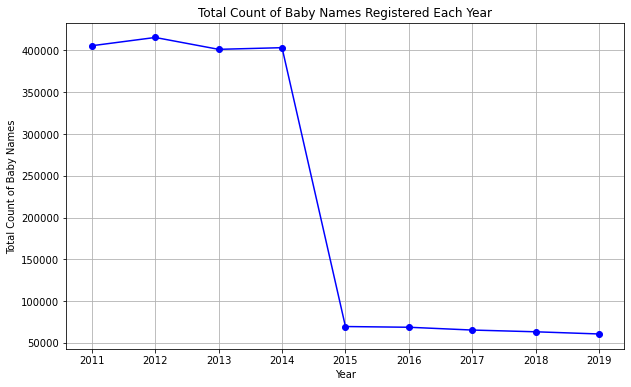

In [18]:
yearly_counts = names_df.groupby('Year')['Count'].sum()
plt.figure(figsize=(10, 6))
yearly_counts.plot(marker='o', color='b')
plt.xlabel('Year')
plt.ylabel('Total Count of Baby Names')
plt.title('Total Count of Baby Names Registered Each Year')
plt.grid(True)
plt.show()

We can see that from 2011 to 2014, the number of baby names registered was exponentially higher than the amount of names from 2015 to 2019. There seems to be a incredible drop within 2014 to 2015, which suggests either the data may be faulty or there was a very low percentage of babies registered.

### Top 5 Names Within Each Ethnicity

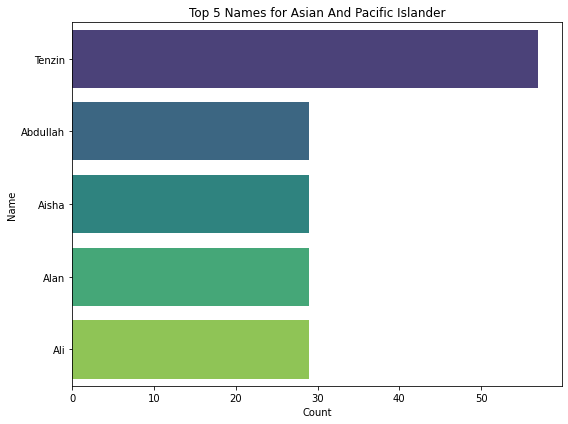

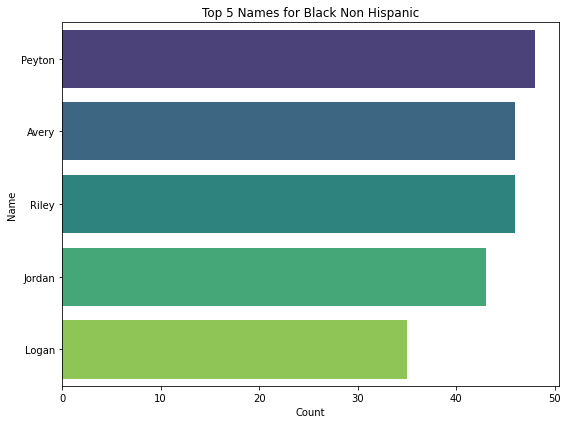

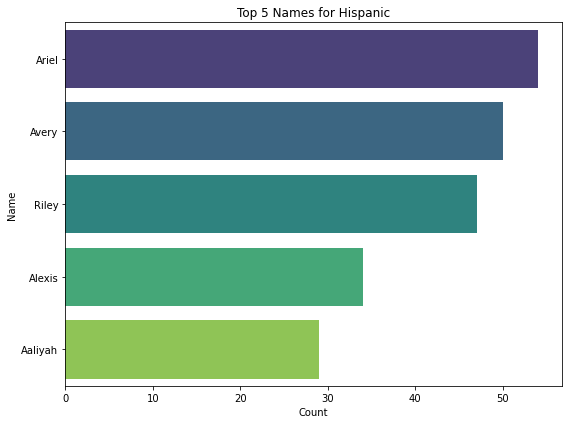

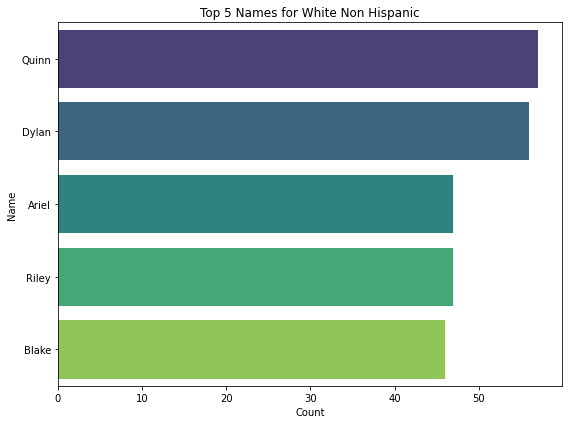

In [19]:
def bar_graph(df):
    for ethnicity in df['Ethnicity'].unique():
        plt.figure(figsize=(8, 6))
        sns.barplot(x='Count', y='Name', data=df[df['Ethnicity'] == ethnicity], palette='viridis')
        plt.xlabel('Count')
        plt.ylabel('Name')
        plt.title(f'Top 5 Names for {ethnicity}')
        plt.tight_layout()
        plt.show()

bar_graph(top_5)


The graphs above compare the distribution of baby names across the different ethnicities. I mainly focused on the top 5 most popular names within each ethnicity in order to highlight which names are the most common. Some names that appeared within more than one ethnicity include Riley, Avery, and Ariel.

### Similarities between each Ethnicity and their Baby Names

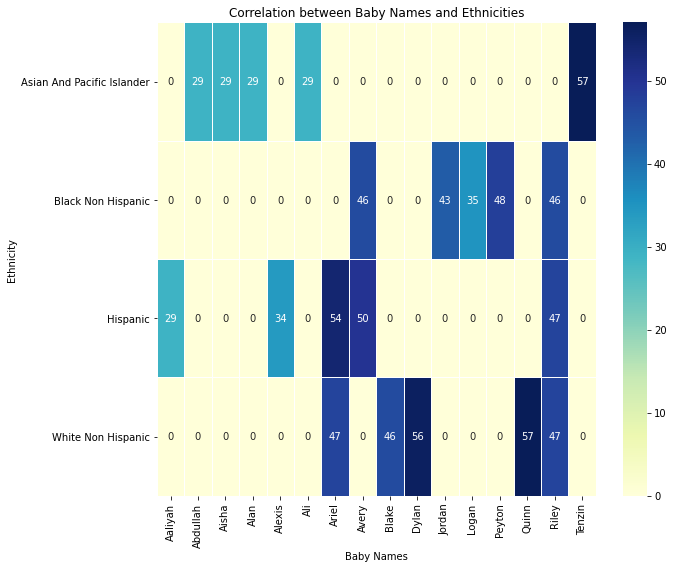

In [20]:
heatmap_data = top_5.pivot_table(index='Ethnicity', columns='Name', values='Count', aggfunc='sum', fill_value=0)
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.xlabel('Baby Names')
plt.ylabel('Ethnicity')
plt.title('Correlation between Baby Names and Ethnicities')
plt.tight_layout()
plt.show()

I used a heatmap to visualize the correlation between baby names and ethnicities, hoping to identify patterns and associations between names and their respective ethnicity. We can see that certain names are popular within multiple ethnicities while some appear in only one.

# Data Analysis & Results

### Proportion of Unique Baby Names in each Ethnicity

I calculated the proportion of each baby name within each ethnicity in order to understand what preferences people have in their respective ethnicity when it comes to naming their child.

In [21]:
total_count = names_df.groupby('Ethnicity')['Count'].sum()
names_df['Proportion'] = names_df.apply(lambda row: row['Count'] / total_count[row['Ethnicity']], axis=1)

In [25]:
#calculate the number of unique names for each ethnicity in each year
diversity = names_df.groupby(['Ethnicity', 'Year'])['Name'].nunique().reset_index(name='Unique_Names')

#calculate the total number of unique names for each ethnicity across all years
total_unique_names = diversity_by_ethnicity.groupby('Ethnicity')['Unique_Names'].sum().reset_index(name='Total_Unique_Names')

#calculate the average number of unique names per year for each ethnicity
average_unique_names = total_unique_names['Total_Unique_Names'] / (names_df['Year'].nunique())

#merge the average number of unique names per year back to the diversity DataFrame
diversity = pd.merge(diversity, total_unique_names, on='Ethnicity')
diversity['Average_Unique_Names_Per_Year'] = average_unique_names

#calculate the proportion of unique names for each ethnicity in each year
diversity['Proportion_Unique_Names'] = diversity['Unique_Names'] / diversity['Total_Unique_Names']

diversity[['Ethnicity', 'Year', 'Proportion_Unique_Names']]


,Ethnicity,Year,Proportion_Unique_Names
0,Asian And Pacific Islander,2011,0.097103
1,Asian And Pacific Islander,2012,0.113658
2,Asian And Pacific Islander,2013,0.110793
3,Asian And Pacific Islander,2014,0.118434
4,Asian And Pacific Islander,2015,0.118752
5,Asian And Pacific Islander,2016,0.119707
6,Asian And Pacific Islander,2017,0.110156
7,Asian And Pacific Islander,2018,0.106017
8,Asian And Pacific Islander,2019,0.105380
9,Black Non Hispanic,2011,0.119760


### OLS Regression: Impact of Ethnicity

I performed a regression analysis to understand how demographic factors, such as ethnicity can have on baby names.

In [23]:
y,x=patsy.dmatrices('Count ~ Ethnicity',names_df)
mod=sm.OLS(y,x)
res_1=mod.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     362.6
Date:                Sat, 05 Aug 2023   Prob (F-statistic):          2.51e-233
Time:                        09:13:27   Log-Likelihood:            -2.9216e+05
No. Observations:               57582   AIC:                         5.843e+05
Df Residuals:                   57578   BIC:                         5.844e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

### Interpretation of OLS Regression

R-Squared value: 0.019
- This indicates that only 1.9% of the variance of the popularity of certain baby names can be explained by ethnicity variables. Thus, ethnicity (on its own) does not have a strong influence on popularity of baby names.

P-values:
- Among the ethnicity values, Hispanic and White Non Hispanic has p-values less than 0.05, suggesting that they are statistically significant. The popularity of baby names differ significantly between these ethnicities and Asian and Pacific Islander (reference ethnicity)
- Black Non Hispanic has a p-value of 0.207, which is greater than 0.05. This suggests that there is no significant difference in baby names' popularity between this ethnicity and and Asian and Pacific Islander (reference ethnicity).

# Ethics & Privacy

My project used a single set of data that was collected through civil birth registration by the Sex and Ethnic Group Data. This dataset was found on an official website and was published as a public dataset. This analysis is only applicable to New York, as it was collected specifically for babies born and registered in New York. The data set is limited to the years of 2011-2019, and was not significantly impacted by pop culture or other factors that may skew the results dramatically. Overall, I have considered potential ethical concerns and issues and addressed them accordingly throughout the tragectory of my project.

# Conclusion & Discussion

The results of the analysis and OLS Regression was able to demonstrate the relationship between ethnicity and baby naming trends in New York from 2011 to 2019. The regression analysis showed that the popularity of baby names varies across distinct ethnicities. For example, names for 'Hispanic' and 'White Non Hispanic' ethnicities had a statistically significant impact on baby naming preferences compared to the 'Asian and Pacific Islander' ethnicity. This implicates that there are cultural and ethnic factors that can play a role when it comes to shaping a choice for the name of your baby.

However, it is interesting to note that the regression analysis also showcased that the 'Black Non Hispanic' ethnicity had no significant impact on baby naming trends. This may suggest that within this specific ethnic group, there may be other factors such as historical, social, or cultural influences (or even just preference) that shape their choice of baby names. We also must note that the R-square value is low, so ethnicity alone does not have a strong influence on baby naming trends.

In conclusion, the analysis offers valuable insight onto the influences of ethnicity on baby naming trends in New York. However, we must understand that the art of baby naming is widely influenced by a wide array of complex factors. 

### Limitations

I initially was struggling to find a dataset that was interesting enough for me to make a research question on. I changed my choice a lot, which made it difficult to even begin the project. I had trouble getting my own repo, which I am not sure if I have one yet, and I never was able to find a group to join (which was definitely my fault!). I think completing this project alone was incredibly challenging especially due to my other commitments that take up 40+ hours of my week. However, all that aside, I tried to make good choices and push through!

My data was limited as I could only find data from New York and not California or San Diego, but I love New York and was still interested in its baby names. I was also not expecting the data to only be from 2011 to 2019, but it still had a large amount of data to analyze and interpret. The regression model also had a low R-square value, which indicates that ethnicity alone cannot explain a substantial portion of the variation in the baby names' popularity. We would need to explore other variables.

# Team Contributions

- Nini Pham: everything! (plus help from articles, TA, professor)

Thank you for an amazing quarter! lthough I have struggled a bit with finishing this project with my best efforts, I hope I was able to finish the quarter off strong. Thank you again!! <3